# Syed Farhan Alam Zaidi
# 2018210031
# Assignment 03
## k-Means Clustering Algorithm


In this portion, the required libraries or packages are import for the execution of the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy


The function "generatePointandCluster(k,p)" takes two inputs k and p. k is the number of clusters and p is the number of points (x,y) for each cluster. and returns the data, centers, centers_old, centers_new and distances.

data = data is the points of array with 2 columns.
center = centers are the randomly generated centeroid.
centers_old = It is the numpy array for calculating the centers. It stores old centers. Initially,  Its is the array of zeros.
centers_new= It stores the updated (x,y) values of the centers. Its initial values is array of zeros.
distances = its the varibale that stores the distance between two points

copy.deep copy is used to deeply copy the veriables with the same shape and elements.

In [2]:
def generatePointandCluster(k,p):
   ######### Generate random points ################
    d=[]
    z=1
    i=1
    j=0
    data = np.random.randn(0, 2)
    m=2
    n=1
    center=[]
    while i<=k:
        ee=[]
        ee=np.array([m,n])
        m=m+3
        n=n+4
        i=i+1
        center=np.append(center,ee)   
        
    while z<=k:
        
        d = np.random.randn(p, 2)+center[j:j+1]
        
        j=j+2
        z=z+1
        data = np.concatenate((data,d),axis=0)
    ############## create random centeroids using means and standard deviation
    c = data.shape[1]
    n = data.shape[0]
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean
    
    ##############Plot the random generated data and points
    plt.figure(0)
    plt.scatter(data[0:,0], data[0:,1], c='b', s=7)
    
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
    plt.title('Initial Data Plot')
    ############# creating initial variables for store old centers and new centers
    centers_old = np.zeros(centers.shape) # stores old centers
    centers_new = copy.deepcopy(centers) # Store new centers
    print ('Initial centers: ' , str(centers_new) )
    ################## Make the zeros array for cluster and distances 
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    return data, centers, centers_old, centers_new, distances, clusters
   

 

This section computes the energy, error, or cost between the centers. We aim to minimize the energy.
$$||A||_F = [\sum_{i,j} abs(a_{i,j})^2]^{1/2}$$

In [3]:
def computeEnergy(centers_new,centers_old):
    error = np.linalg.norm(centers_new - centers_old)
    return error

The ComputerDistance function computes the distance from each point to each center.

In [4]:
def computeDistance(data, centers,distances):
    for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    return distances
   

assignlabels computes the minimus distance and assign the labels according to closest center

In [5]:
def assignLable(distances,centers_new):
    clusters = np.argmin(distances, axis = 1)
    centers_old = copy.deepcopy(centers_new) ####### copy the old centers
    return clusters, centers_old

Computecenteroid calculate the new centers by calculating the average of the data points of each culusters

In [6]:
def computeCentoroid(k,data, clusters):
    for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
    return centers_new

kMeans is the function that use all above define function it is iterative function that is handel from main function. It will execute till error=0.

In [7]:
def kMeans(k, data, centers, centers_old, centers_new, distances,error):
    
    distances = computeDistance(data, centers,distances)
    clusters, centers_old = assignLable(distances,centers_new)
    centers_new = computeCentoroid(k,data, clusters)
    error = computeEnergy(centers_new,centers_old)
  
    
    
    return error,clusters,data,centers_new

Below is the main function. It is the starting point of the kMeans clustering program's execution. We can set the k and p of own choice. k is the number of clusters and p is the points to be generate as training data.

Initial centers:  [[5.90050099 7.4495643 ]
 [4.30106406 4.98107235]
 [4.75018909 3.4211765 ]]
Results: 
Initial Energy: 12.957272047624476
############ iteration 1
Centeroid:  [[7.81896257 7.88679054]
 [4.3304121  5.04898731]
 [2.81023996 2.40199552]]
Energy: 2.946059723915192
############ iteration 2
Centeroid:  [[7.81896257 7.88679054]
 [4.3304121  5.04898731]
 [2.81023996 2.40199552]]
Energy: 0.0


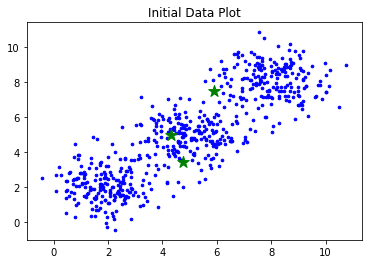

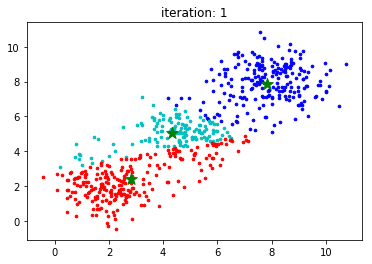

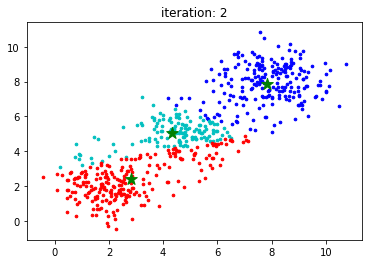

In [9]:
if __name__== "__main__":
    k=3
    p=200
    ####################### Below function creates the data points and centers and initialize some required variables.
    data, centers, centers_old, centers_new, distances, clusters = generatePointandCluster(k,p)
    ####################### Computer initial error or energy between centeroids
    error = computeEnergy(centers_new,centers_old)
    print ('Results: ')
    print ('Initial Energy:',error)
    
    a=1
    ####################### Loop to iterate kMeans function. Loop will terminate when the error = 0
    while error != 0:
        print ('############ iteration', a)
        
        error,clusters,data,centers_new= kMeans(k, data, centers, centers_old, centers_new, distances,error)
        print ('Centeroid: ',str(centers_new))
        plt.figure(a)
        #####################list of colors for plot points.
        colors=['b','c','r','m','y','k','w']
        ################################### loop for plotting each data point or cluster with different color.
        for i in range(k):
            plt.scatter(data[clusters == i,0], data[clusters == i,1], c=colors[i], s=7)
        plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
        plt.title('iteration: ' + str(a))
        print ('Energy:',error)
        a=a+1
    

Initial data Plot:
In this plot, all the randomly generated data points and clusters are shown.

Iteration{} plot:
In this plot, the plot after the execution is shown. The updated data points are shown with in form of clusters with different colors.

['b','c','r','m','y','k','w']
This is the list of clusters.
[blue, cyan, red, Magenta, yellow, Black, White]


Github Link: https://github.com/farhan-93/assignment03.git